In [ ]:
from pyspark.sql import SparkSession
# Create a Spark session
spark = SparkSession.builder.appName("KCCrime").getOrCreate()

In [ ]:
KCDPFinal = spark.read.csv('/content/drive/MyDrive/KCDP_Final_Crime_Data_Original_1.csv', inferSchema=True, header=True)


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/KCDP_Final_Crime_Data_Original_1.csv", low_memory=False)


In [ ]:
# Filter data for the years 2020 to 2024
filtered_data = data[(data['Reported_year'] >= 2020) & (data['Reported_year'] <= 2024)]

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349353 entries, 0 to 349566
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report_No          349353 non-null  object 
 1   Reported_year      349353 non-null  int64  
 2   Reported_month     349353 non-null  int64  
 3   Reported_day       349353 non-null  int64  
 4   Reported_hour      349353 non-null  int64  
 5   Reported_minute    349353 non-null  int64  
 6   From_year          349353 non-null  int64  
 7   From_month         349353 non-null  int64  
 8   From_day           349353 non-null  int64  
 9   From_hour          349353 non-null  int64  
 10  From_minute        349353 non-null  int64  
 11  Offense            349353 non-null  object 
 12  IBRS               349353 non-null  object 
 13  Description        349353 non-null  object 
 14  Beat               349353 non-null  float64
 15  Address            349353 non-null  object 
 16  City   

In [ ]:
KCDPFinal.createOrReplaceTempView(name = "kccrime")

what we used pyspark ante
for processing the data for visualisation using sql queries
we can run sql queries in spark
and for visualisation we used matplot lib

In [ ]:
query1 = spark.sql("select * from kccrime limit 2")
query1.show()

+----------+-------------+--------------+------------+-------------+---------------+---------+----------+--------+---------+-----------+--------------------+----+--------------------+-----+--------------------+-----------+--------+--------+----+------+-----------+----+---+----+-----------------+
| Report_No|Reported_year|Reported_month|Reported_day|Reported_hour|Reported_minute|From_year|From_month|From_day|From_hour|From_minute|             Offense|IBRS|         Description| Beat|             Address|       City|Zip_Code|Rep_Dist|Area|DVFlag|Involvement|Race|Sex| Age|Firearm_Used_Flag|
+----------+-------------+--------------+------------+-------------+---------------+---------+----------+--------+---------+-----------+--------------------+----+--------------------+-----+--------------------+-----------+--------+--------+----+------+-----------+----+---+----+-----------------+
|KC20017500|         2020|             3|           8|           19|             24|     2020|         3|    

In [ ]:
query1 = spark.sql("select description, count(*) as count from kccrime group by description")
query1.show()

+--------------------+-----+
|         description|count|
+--------------------+-----+
|     Purse-Snatching|  155|
|Theft of Vehicle ...|10911|
|Curfew / Loiterin...|   42|
|         Drunkenness|   11|
|      Statutory Rape|  312|
|Vandalism/Destruc...|34062|
|Liquor Law Violat...|   74|
|        Intimidation| 8561|
|     Forcible Sodomy| 1200|
|  All Other Offenses|14192|
|      Simple Assault|48465|
|Stolen Property O...| 3898|
|Theft From Coin-O...|   64|
|Assisting or Prom...|   12|
|Sexual Assault Wi...|   73|
|             Robbery|12380|
|        Embezzlement| 1219|
|Hacking / Compute...|  105|
| Commercial Sex Acts|   52|
|Pornography / Obs...|  184|
+--------------------+-----+
only showing top 20 rows



In [ ]:
query1.toPandas().to_csv('query-1.csv')

In [ ]:
import re
crime_list = []

for k in query1.select("description").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.description)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

60


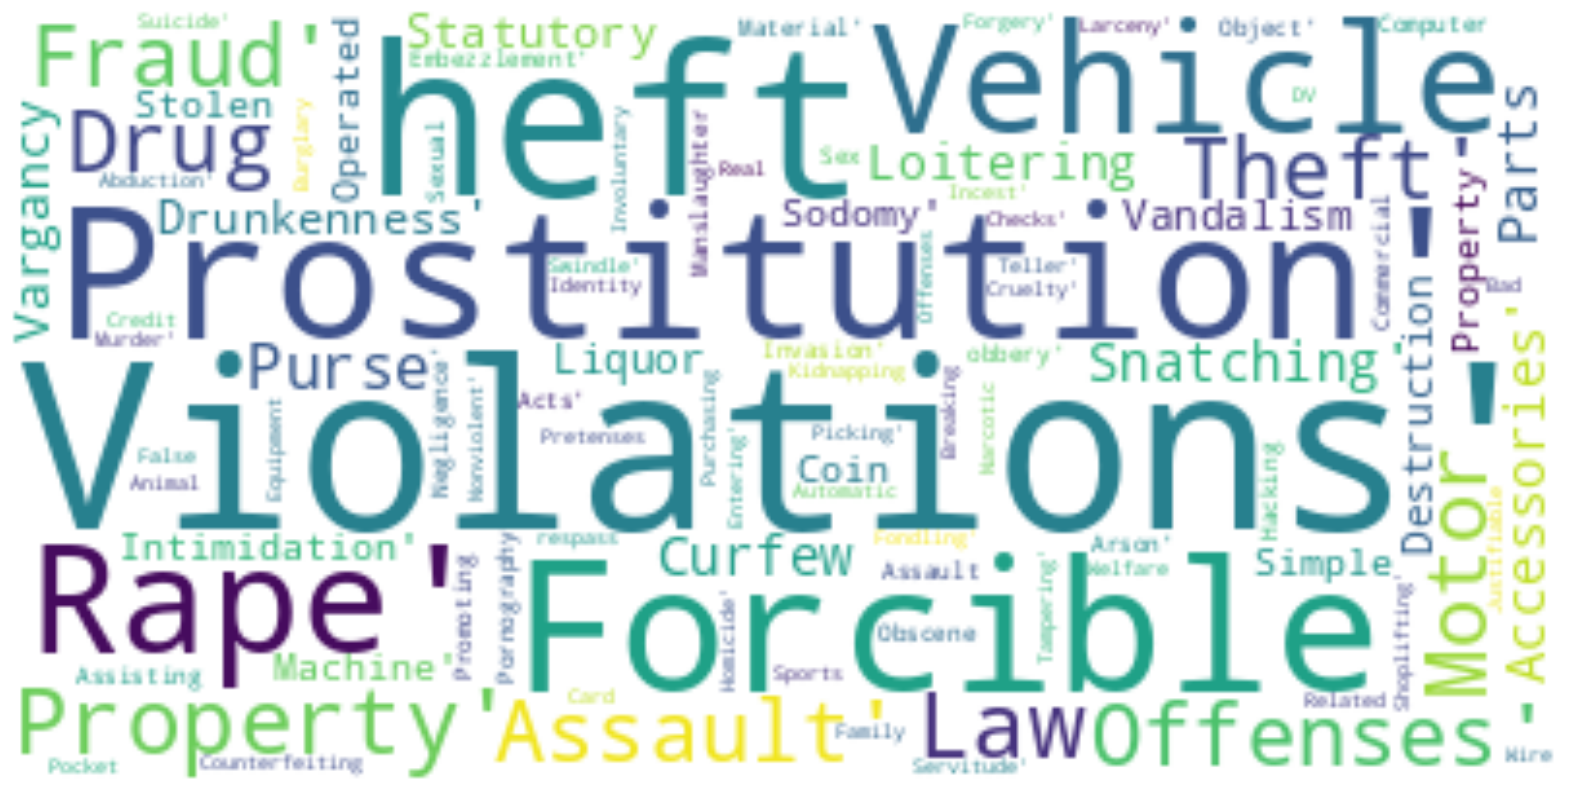

In [ ]:
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

q1_data = pd.read_csv('query-1.csv')

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size= 500, stopwords = stopwords, max_words=5000,contour_width=3, background_color="white").generate(str(crime_list))
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
query2o = spark.sql("select Reported_year, Sex, count(*) as count from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2024' group by Reported_year, Sex")
query2o.show()
query2t = spark.sql("select Reported_year, Sex, count(*) as count from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2021' group by Reported_year, Sex")
query2t.show()

+-------------+---+-----+
|Reported_year|Sex|count|
+-------------+---+-----+
|         2024|  M|35424|
|         2024|  U|10285|
|         2024|  F|24961|
+-------------+---+-----+

+-------------+---+-----+
|Reported_year|Sex|count|
+-------------+---+-----+
|         2021|  U| 9136|
|         2021|  F|23266|
|         2021|  M|35023|
+-------------+---+-----+



In [ ]:
#Save the output in csv file
query2o.toPandas().to_csv('query-2o.csv')
query2t.toPandas().to_csv('query-2t.csv')

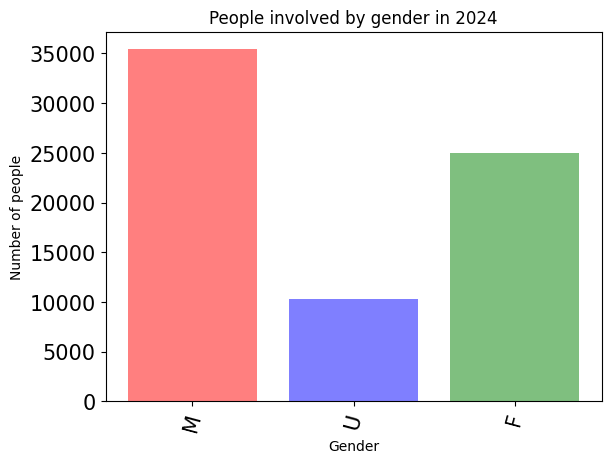

In [ ]:
#Query 1 visualization code
q1_data = pd.read_csv('query-2o.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green'))
plt.ylabel('Number of people')
plt.xlabel('Gender')
plt.title('People involved by gender in 2024')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

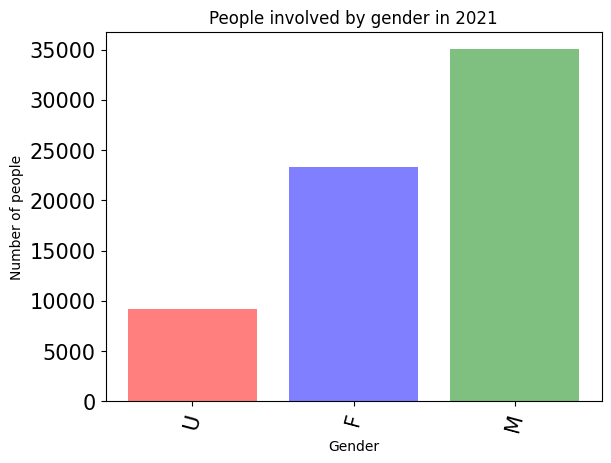

In [ ]:

#Query 1 visualization code
q1_data = pd.read_csv('query-2t.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green'))
plt.ylabel('Number of people')
plt.xlabel('Gender')
plt.title('People involved by gender in 2021')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
query3 = spark.sql("select Reported_year, Sex, Involvement, count(*) as count, Zip_Code from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2022' and Zip_Code = '64124' and Involvement like 'ARR%' group by Reported_year, Sex, Involvement, Zip_Code sort by count desc limit 2")
query3.show()

+-------------+---+-----------+-----+--------+
|Reported_year|Sex|Involvement|count|Zip_Code|
+-------------+---+-----------+-----+--------+
|         2022|  M|ARR CHA SUS|  328|   64124|
|         2022|  F|ARR CHA SUS|  133|   64124|
+-------------+---+-----------+-----+--------+



In [ ]:
#Save the output in csv file
query3.toPandas().to_csv('query-3.csv')

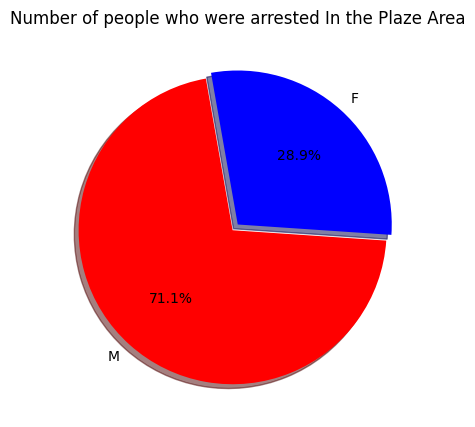

In [ ]:
# Query 3 visualization code
q3_data = pd.read_csv('query-3.csv')

plt.figure(figsize=(5, 5))

account_type = q3_data["Sex"]
tweetsNumber = q3_data["count"]
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(tweetsNumber, labels=account_type, explode = (0.05,0), colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)
plt.title("Number of people who were arrested In the Plaze Area")
plt.show()

+-------------+--------------+
|Reported_year|total_offenses|
+-------------+--------------+
|         2020|         53703|
|         2021|         67425|
|         2022|         75414|
|         2023|         82141|
|         2024|         70670|
+-------------+--------------+



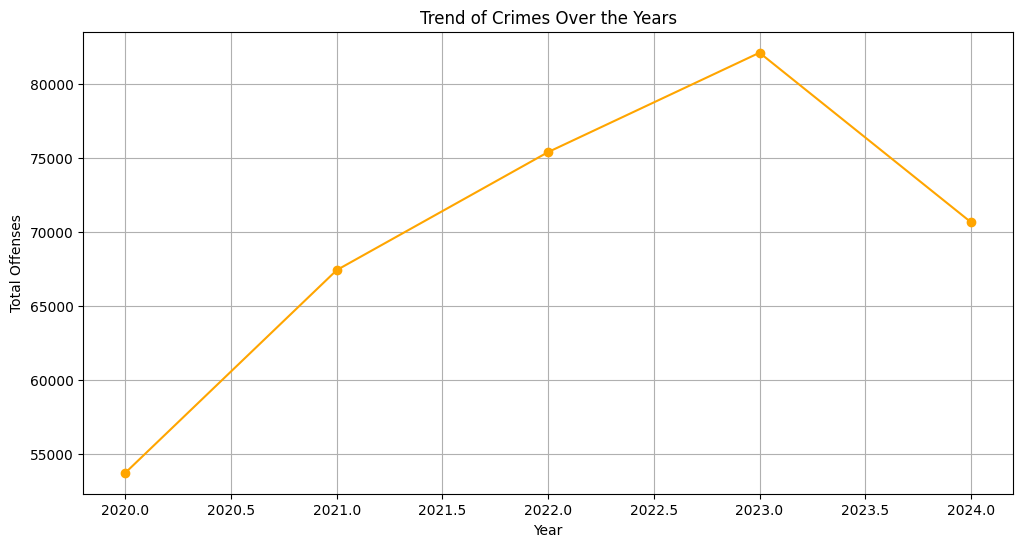

In [ ]:
# Query to get the count of crimes per year
query15 = spark.sql("""
    SELECT Reported_year, COUNT(*) AS total_offenses
    FROM kccrime
    where reported_year >= '2020'
    GROUP BY Reported_year

    ORDER BY Reported_year
""")

query15.show()

# Convert the query results to a Pandas DataFrame for plotting
yearly_offense_counts = query15.toPandas()
yearly_offense_counts.to_csv('yearly_offense_counts.csv', index=False)

plt.figure(figsize=(12, 6))
plt.plot(yearly_offense_counts['Reported_year'], yearly_offense_counts['total_offenses'], marker='o', color='orange')
plt.title('Trend of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Offenses')
plt.grid()

# Display the plot
plt.show()


In [ ]:
age_group_query = """
    SELECT
        CASE
            WHEN Age >= 0 AND Age < 18 THEN '0-17'
            WHEN Age >= 18 AND Age < 30 THEN '18-29'
            WHEN Age >= 30 AND Age < 40 THEN '30-39'
            WHEN Age >= 40 AND Age < 50 THEN '40-49'
            WHEN Age >= 50 AND Age < 60 THEN '50-59'
            WHEN Age >= 60 AND Age < 70 THEN '60-69'
            WHEN Age >= 70 THEN '70+'
            ELSE 'U'
        END AS Age_Group,
        COUNT(*) AS Count
    FROM kccrime
    GROUP BY Age_Group
    ORDER BY Count desc
"""

# Run the query
age_group_counts = spark.sql(age_group_query)
age_group_counts.show()

# Convert to Pandas for visualization
age_group_counts_df = age_group_counts.toPandas()
age_group_counts_df.to_csv('age_group_counts.csv', index=False)

+---------+------+
|Age_Group| Count|
+---------+------+
|    30-39|164409|
|    18-29| 81275|
|    40-49| 46917|
|    50-59| 30924|
|    60-69| 18198|
|      70+|  7844|
+---------+------+



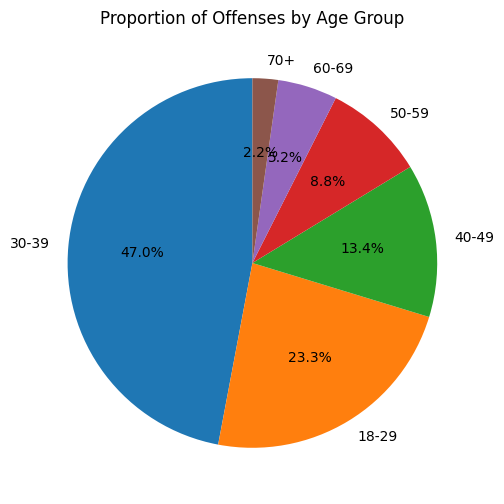

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(
    age_group_counts_df['Count'],
    labels=age_group_counts_df['Age_Group'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Proportion of Offenses by Age Group')
plt.ylabel('')
plt.show()

In [ ]:
# Query to get firearm usage counts by age group
firearm_age_query = """
    SELECT
        CASE
            WHEN Age >= 0 AND Age < 18 THEN '0-17'
            WHEN Age >= 18 AND Age < 30 THEN '18-29'
            WHEN Age >= 30 AND Age < 40 THEN '30-39'
            WHEN Age >= 40 AND Age < 50 THEN '40-49'
            WHEN Age >= 50 AND Age < 60 THEN '50-59'
            WHEN Age >= 60 AND Age < 70 THEN '60-69'
            WHEN Age >= 70 THEN '70+'
            ELSE 'Unknown'
        END AS Age_Group,
        COUNT(*) AS Firearm_Count
    FROM kccrime
    WHERE Firearm_Used_Flag = 1
    GROUP BY Age_Group
    ORDER BY Age_Group
"""

# Run the query
firearm_age_counts = spark.sql(firearm_age_query)
firearm_age_counts.show()

# Convert to Pandas for plotting
firearm_age_counts_df = firearm_age_counts.toPandas()
firearm_age_counts_df.to_csv('firearm_age_counts.csv', index=False)


+---------+-------------+
|Age_Group|Firearm_Count|
+---------+-------------+
|    18-29|         9447|
|    30-39|        14829|
|    40-49|         3586|
|    50-59|         2201|
|    60-69|         1125|
|      70+|          415|
+---------+-------------+



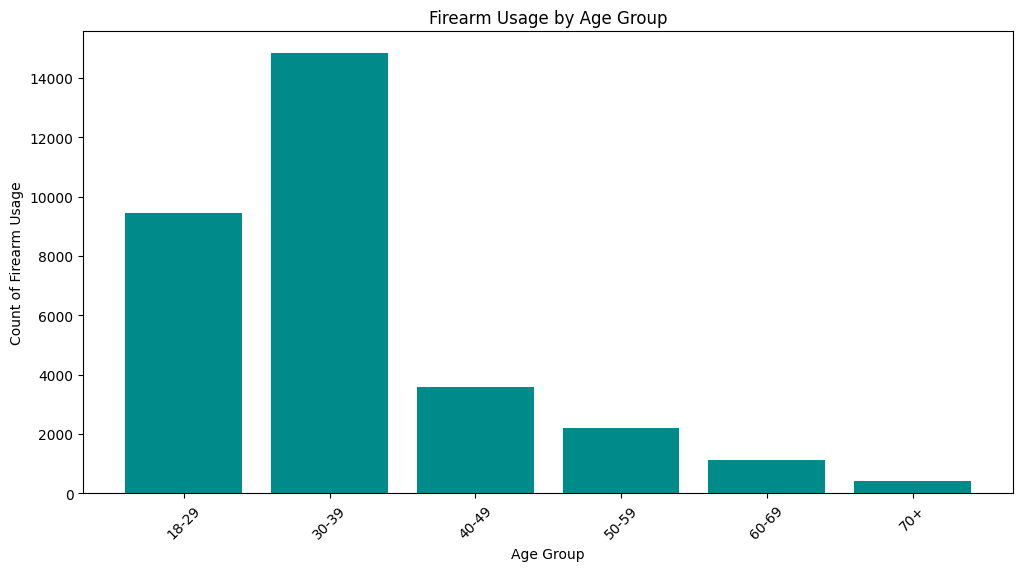

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(firearm_age_counts_df['Age_Group'], firearm_age_counts_df['Firearm_Count'], color='darkcyan')
plt.title('Firearm Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Firearm Usage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Query to get the count of crimes by month
crime_by_month_query = """
    SELECT
        Reported_month,
        COUNT(*) AS Crime_Count
    FROM kccrime
    GROUP BY Reported_month
    ORDER BY Reported_month
"""

# Execute the query
crime_by_month = spark.sql(crime_by_month_query)
crime_by_month.show()

# Convert the results to a Pandas DataFrame for plotting
crime_by_month_df = crime_by_month.toPandas()
crime_by_month_df.to_csv('crime_by_month.csv', index=False)


+--------------+-----------+
|Reported_month|Crime_Count|
+--------------+-----------+
|             1|      28255|
|             2|      25794|
|             3|      28187|
|             4|      28692|
|             5|      31420|
|             6|      32568|
|             7|      34635|
|             8|      34898|
|             9|      33160|
|            10|      29388|
|            11|      22652|
|            12|      19918|
+--------------+-----------+



<ipython-input-26-cd63a1e895a7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Crime_Count', data=crime_by_month_df, palette="viridis")


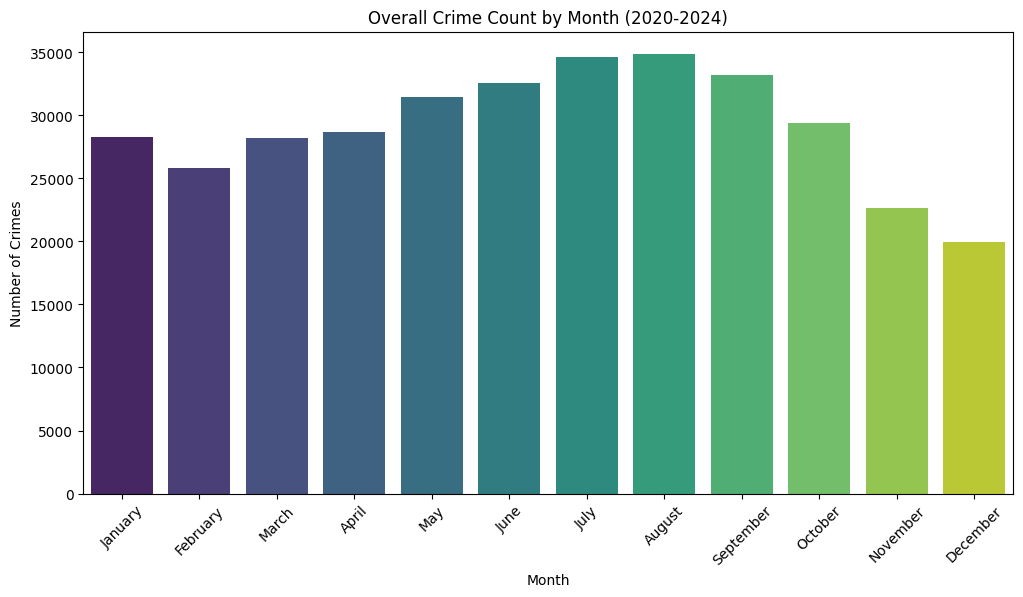

In [ ]:
import calendar
crime_by_month_df['Reported_month'] = crime_by_month_df['Reported_month'].astype(int)
crime_by_month_df = crime_by_month_df.sort_values('Reported_month')
crime_by_month_df['Month_Name'] = crime_by_month_df['Reported_month'].apply(lambda x: calendar.month_name[x])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Month_Name', y='Crime_Count', data=crime_by_month_df, palette="viridis")
plt.title('Overall Crime Count by Month (2020-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-a0b5808f3a48>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Crime_Count', data=crime_by_month_df, palette="viridis")


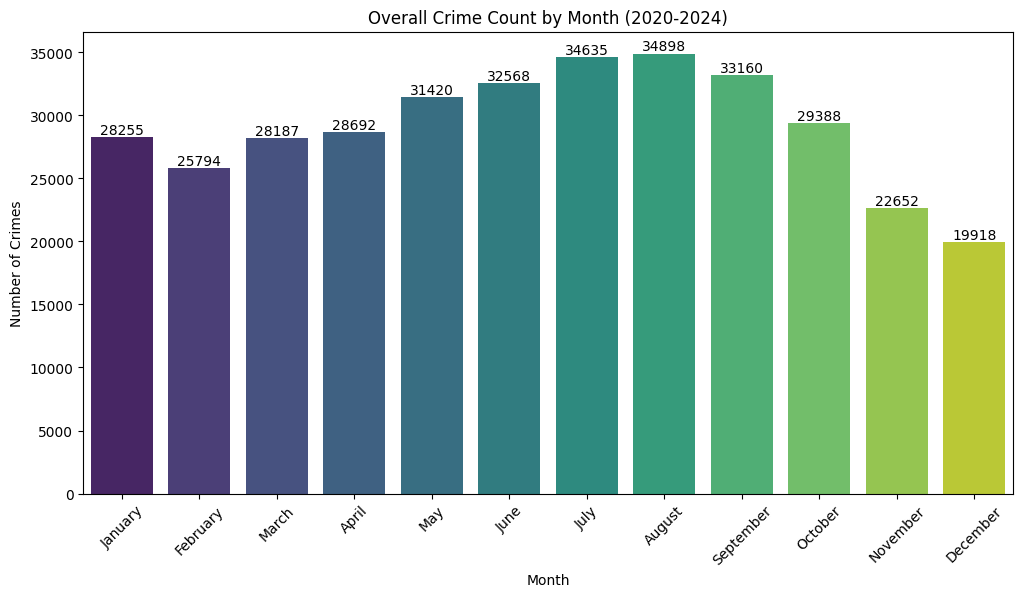

In [ ]:
crime_by_month_df['Reported_month'] = crime_by_month_df['Reported_month'].astype(int)
crime_by_month_df = crime_by_month_df.sort_values('Reported_month')
crime_by_month_df['Month_Name'] = crime_by_month_df['Reported_month'].apply(lambda x: calendar.month_name[x])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Month_Name', y='Crime_Count', data=crime_by_month_df, palette="viridis")
plt.title('Overall Crime Count by Month (2020-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

# Adding the count labels on top of each bar
for index, row in crime_by_month_df.iterrows():
    plt.text(index, row['Crime_Count'], int(row['Crime_Count']), ha='center', va='bottom')

plt.show()


In [ ]:
print(crime_by_month_df)

    Reported_month  Crime_Count Month_Name
0                1        28255    January
1                2        25794   February
2                3        28187      March
3                4        28692      April
4                5        31420        May
5                6        32568       June
6                7        34635       July
7                8        34898     August
8                9        33160  September
9               10        29388    October
10              11        22652   November
11              12        19918   December


In [ ]:
# Run a Spark SQL query to get the top 10 most frequent offense types
query_top_offenses = spark.sql("""
    SELECT Offense, COUNT(*) AS offense_count
    FROM kccrime
    GROUP BY Offense
    ORDER BY offense_count DESC
    LIMIT 10
""")
query_top_offenses.show()
# Convert the Spark SQL query result to a Pandas DataFrame
top_offenses_df = query_top_offenses.toPandas()


+--------------------+-------------+
|             Offense|offense_count|
+--------------------+-------------+
|         Stolen Auto|        36143|
|Domestic Violence...|        29804|
|     Property Damage|        26086|
|Stealing from Aut...|        23563|
|Assault (Aggravated)|        23431|
|Assault (Non-Aggr...|        19943|
| Stealing - Shoplift|        17896|
|Trespass of Real ...|        14055|
|Stealing from Aut...|        10516|
|Domestic Violence...|         9907|
+--------------------+-------------+



<ipython-input-29-53141b888448>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Offense', x='offense_count', data=top_offenses_df, palette="coolwarm")


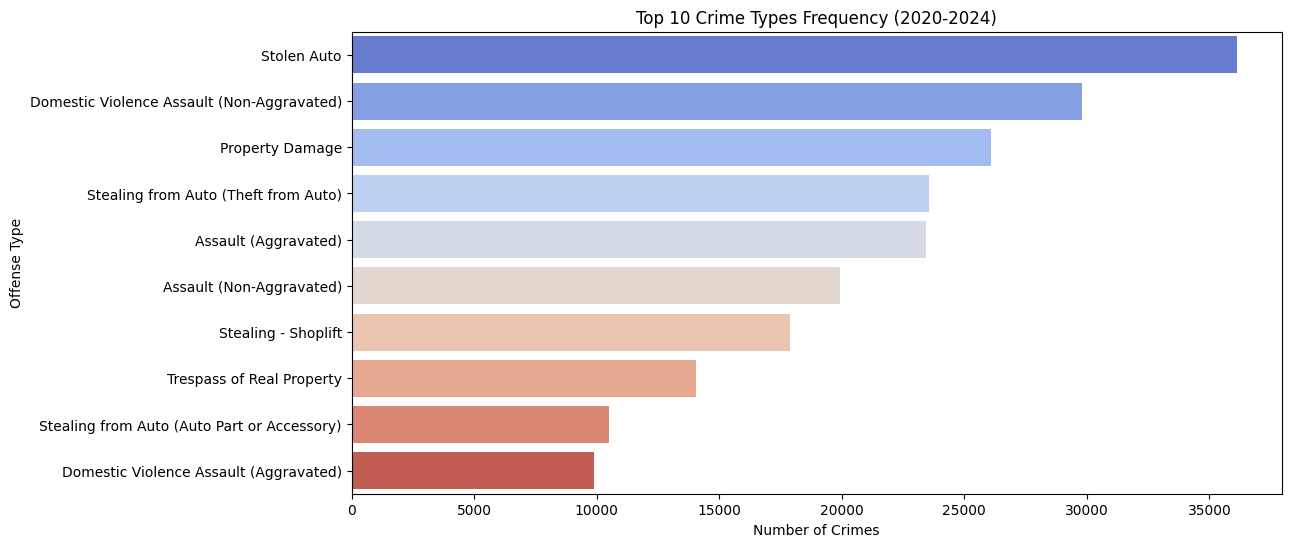

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Offense', x='offense_count', data=top_offenses_df, palette="coolwarm")
plt.title('Top 10 Crime Types Frequency (2020-2024)')
plt.xlabel('Number of Crimes')
plt.ylabel('Offense Type')
plt.show()

In [ ]:
# Query to get the top 10 most frequent crime descriptions
query_top_descriptions = spark.sql("""
    SELECT Description, COUNT(*) AS description_count
    FROM kccrime
    GROUP BY Description
    ORDER BY description_count DESC
    LIMIT 10
""")
query_top_descriptions.show()
# Convert Spark DataFrame to Pandas DataFrame
top_descriptions_df = query_top_descriptions.toPandas()


+--------------------+-----------------+
|         Description|description_count|
+--------------------+-----------------+
|      Simple Assault|            48465|
| Motor Vehicle Theft|            36259|
|  Aggravated Assault|            34956|
|Vandalism/Destruc...|            34062|
|Theft From Motor ...|            23178|
|         Shoplifting|            23062|
|Burglary/Breaking...|            17353|
|Trespass of Real ...|            16121|
|  All Other Offenses|            14192|
|   All Other Larceny|            13450|
+--------------------+-----------------+



<ipython-input-31-026143507249>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Description', x='description_count', data=top_descriptions_df, palette="Spectral")


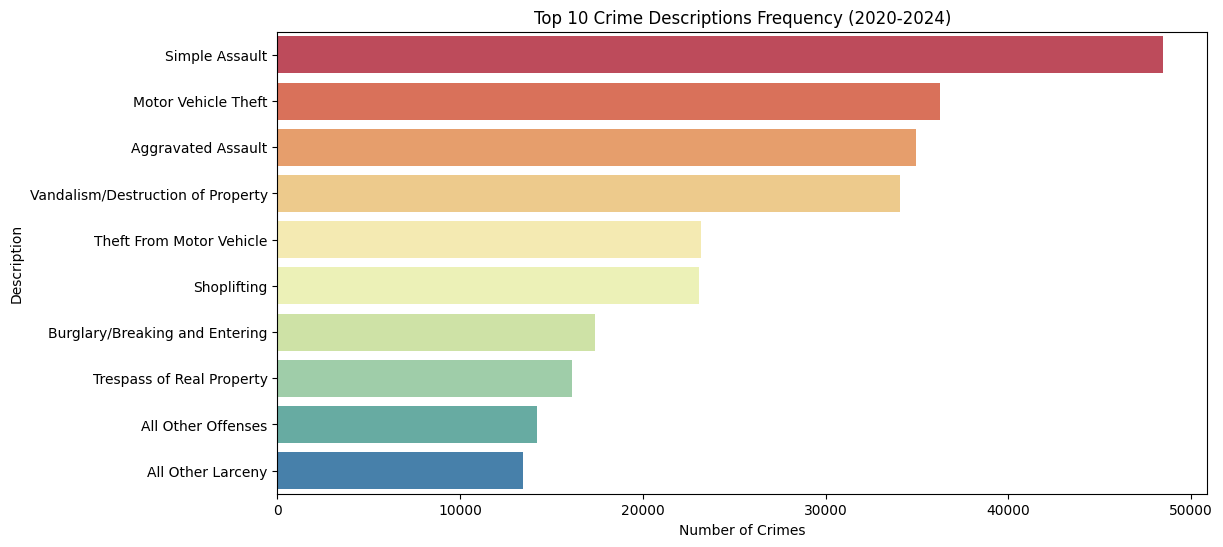

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Description', x='description_count', data=top_descriptions_df, palette="Spectral")
plt.title('Top 10 Crime Descriptions Frequency (2020-2024)')
plt.xlabel('Number of Crimes')
plt.ylabel('Description')
plt.show()

In [ ]:
# Query to get the top 10 zip codes by crime count
query_top_zip_codes = spark.sql("""
    SELECT Zip_Code, COUNT(*) AS crime_count
    FROM kccrime
    GROUP BY Zip_Code
    ORDER BY crime_count DESC
    LIMIT 10
""")
query_top_zip_codes.show()
# Convert Spark DataFrame to Pandas DataFrame
top_zip_codes_df = query_top_zip_codes.toPandas()


+--------+-----------+
|Zip_Code|crime_count|
+--------+-----------+
| 64111.0|      16256|
| 64130.0|      13403|
| 64127.0|      12130|
| 64108.0|      11265|
|   64111|      10561|
| 64132.0|      10368|
| 64128.0|       9366|
| 64106.0|       9031|
|   64130|       8932|
| 64133.0|       8233|
+--------+-----------+



In [ ]:
# Query to get the top 10 zip codes by crime count
query_top_zip_codes = spark.sql("""
    SELECT Zip_Code, COUNT(*) AS crime_count
    FROM kccrime
    GROUP BY Zip_Code
    ORDER BY crime_count
    LIMIT 10
""")
query_top_zip_codes.show()
# Convert Spark DataFrame to Pandas DataFrame
top_zip_codes_df = query_top_zip_codes.toPandas()


+--------+-----------+
|Zip_Code|crime_count|
+--------+-----------+
|   64103|          1|
| 66101.0|          1|
| 66105.0|          1|
| 64064.0|          1|
|   64135|          1|
| 64081.0|          1|
| 66211.0|          1|
| 64192.0|          1|
| 64107.0|          1|
| 66208.0|          1|
+--------+-----------+



<ipython-input-33-641c48f236f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zip_Code', y='crime_count', data=top_zip_codes_df, palette="magma")


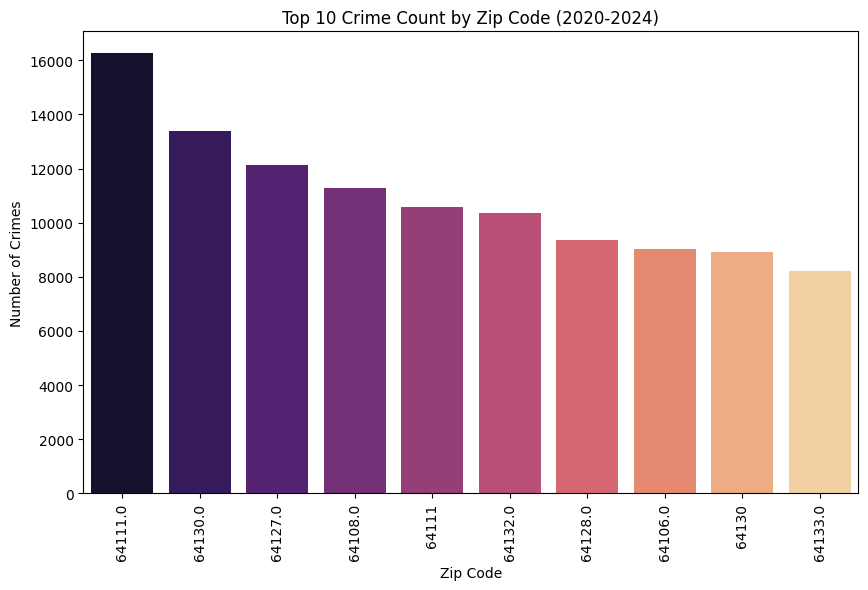

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Zip_Code', y='crime_count', data=top_zip_codes_df, palette="magma")
plt.title('Top 10 Crime Count by Zip Code (2020-2024)')
plt.xlabel('Zip Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Map values in DVFlag to True or False using Pandas
filtered_data['DVFlag'] = filtered_data['DVFlag'].replace({'Y': True, 'True': True, 'N': False, 'False': False})

# Check the result
print(filtered_data['DVFlag'].value_counts())


DVFlag
False    317373
True      31980
Name: count, dtype: int64


<ipython-input-34-2ce3c547fe9b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data['DVFlag'] = filtered_data['DVFlag'].replace({'Y': True, 'True': True, 'N': False, 'False': False})
<ipython-input-34-2ce3c547fe9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DVFlag'] = filtered_data['DVFlag'].replace({'Y': True, 'True': True, 'N': False, 'False': False})


<ipython-input-35-a84ff7aeffae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DVFlag', data=filtered_data, palette="pastel")


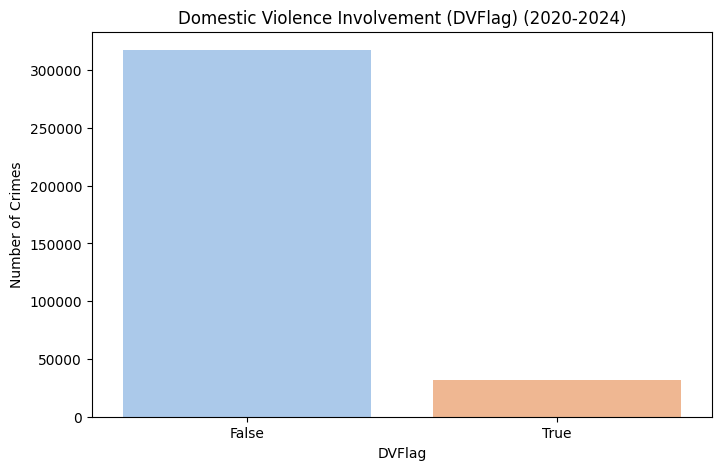

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='DVFlag', data=filtered_data, palette="pastel")
plt.title('Domestic Violence Involvement (DVFlag) (2020-2024)')
plt.xlabel('DVFlag')
plt.ylabel('Number of Crimes')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

<ipython-input-36-301f83f7aa51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DVFlag'] = filtered_data['DVFlag'].astype(str)
<ipython-input-36-301f83f7aa51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DVFlag_Bool'] = filtered_data['DVFlag'].apply(lambda x: x in ['True', 'Y'])


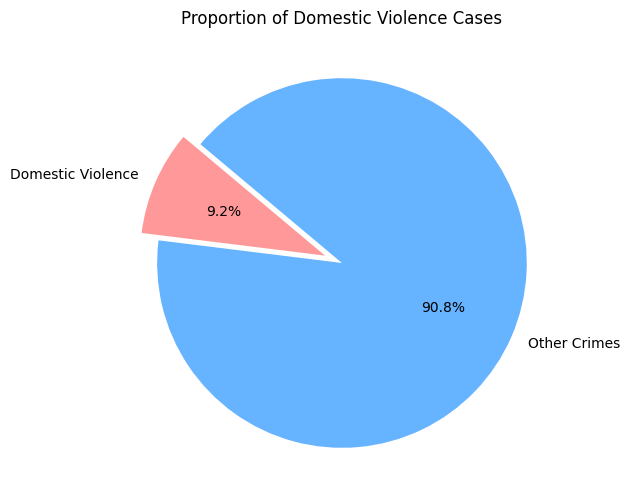

In [ ]:
filtered_data['DVFlag'] = filtered_data['DVFlag'].astype(str)

# Map DVFlag to boolean values: True for 'True' or 'Y', False otherwise
filtered_data['DVFlag_Bool'] = filtered_data['DVFlag'].apply(lambda x: x in ['True', 'Y'])

# Count the number of domestic violence cases and other cases
domestic_violence_count = filtered_data['DVFlag_Bool'].sum()  # True counts as 1
total_crime_count = len(filtered_data)

# Plotting with Matplotlib
labels = ['Domestic Violence', 'Other Crimes']
sizes = [domestic_violence_count, total_crime_count - domestic_violence_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice (Domestic Violence)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Domestic Violence Cases')
plt.show()

<ipython-input-37-6e9c55548815>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Race', data=filtered_data, palette="Set2")


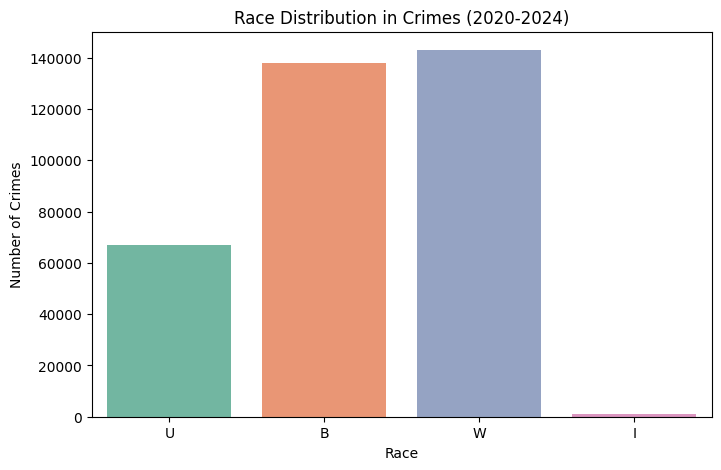

In [ ]:
# 14. Race Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Race', data=filtered_data, palette="Set2")
plt.title('Race Distribution in Crimes (2020-2024)')
plt.xlabel('Race')
plt.ylabel('Number of Crimes')
plt.show()

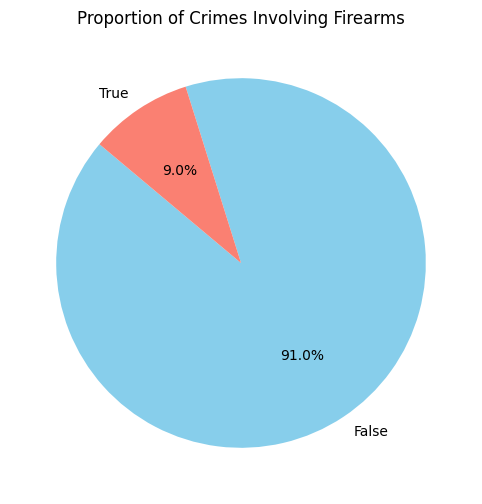

In [ ]:

# Define the pie chart function
def pie_fire_arm(data, title):
    plt.figure(figsize=(8, 6))
    data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
    plt.title(title)
    plt.ylabel('')  # Hide the y-label for a cleaner look
    plt.show()

# Ensure you have the firearm counts from filtered_data
firearm_counts = filtered_data['Firearm_Used_Flag'].value_counts()

# Call the function
pie_fire_arm(firearm_counts, 'Proportion of Crimes Involving Firearms')


Sex
M    20565
F     9726
U     1311
Name: count, dtype: int64



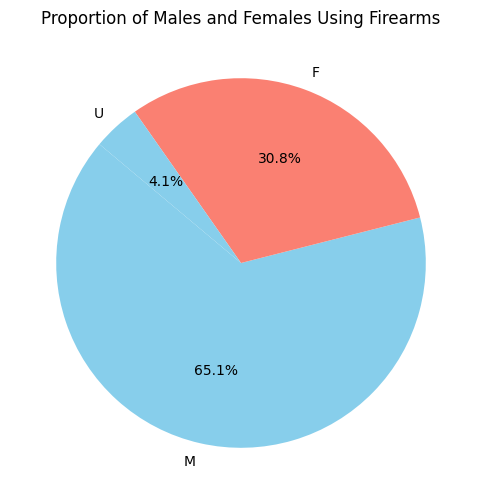

In [ ]:
# Calculate the counts of each gender where 'Firearm_Used_Flag' is 1 in filtered_data
gen_firearm_used = filtered_data[filtered_data['Firearm_Used_Flag'] == 1]['Sex'].value_counts()

# Print the counts for verification
print(gen_firearm_used)
print()

# Plot the pie chart for the gender distribution of firearm usage
plt.figure(figsize=(8, 6))
gen_firearm_used.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Proportion of Males and Females Using Firearms")
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()


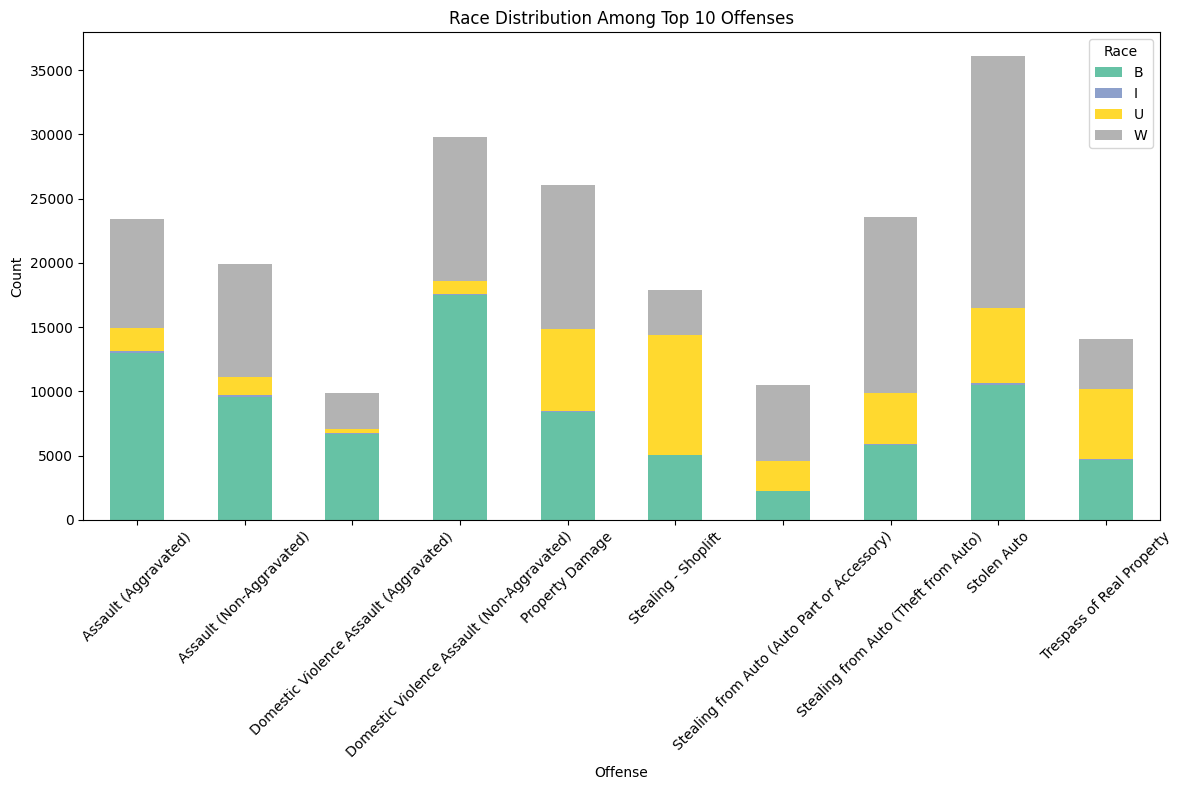

In [ ]:
# Step 1: Count the occurrences of each offense
offense_counts = filtered_data['Offense'].value_counts()

# Step 2: Get the top 10 offenses
top_offenses = offense_counts.nlargest(10).index

# Step 3: Filter the data for top 10 offenses and group by Race and Offense
race_offense_counts = filtered_data[filtered_data['Offense'].isin(top_offenses)].groupby(['Offense', 'Race']).size().unstack().fillna(0)

# Step 4: Create a stacked bar plot for race distribution among offenses
race_offense_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Race Distribution Among Top 10 Offenses')
plt.xlabel('Offense')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



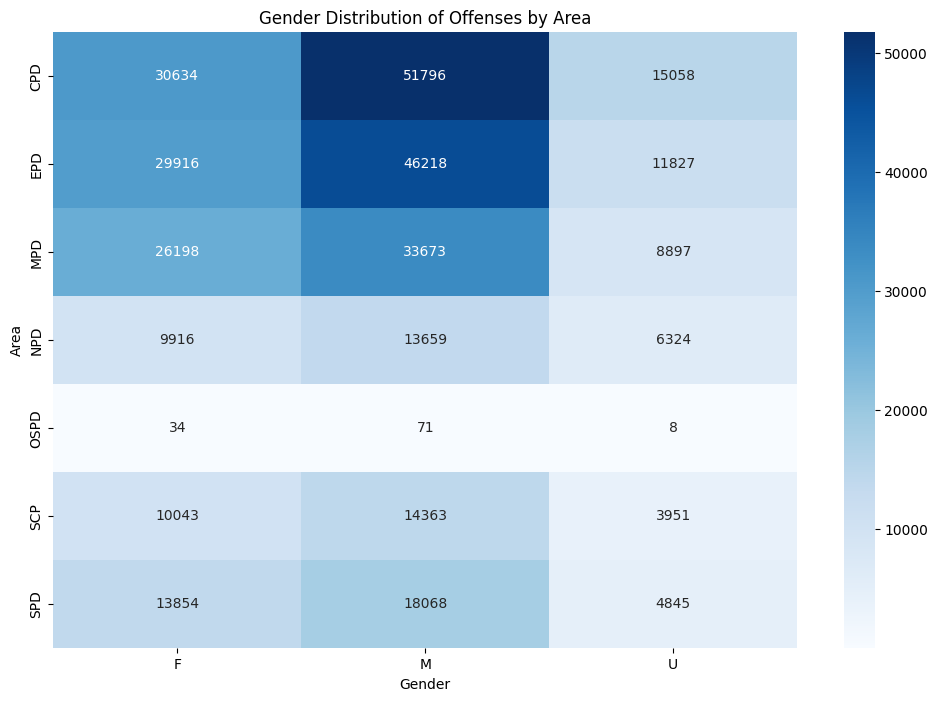

In [ ]:

area_gender_counts = filtered_data.groupby(['Area', 'Sex']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(area_gender_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Gender Distribution of Offenses by Area')
plt.xlabel('Gender')
plt.ylabel('Area')
plt.show()


<ipython-input-42-3fd01671df6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age_Group'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)
<ipython-input-42-3fd01671df6f>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  race_age_heatmap_data = filtered_data.pivot_table(


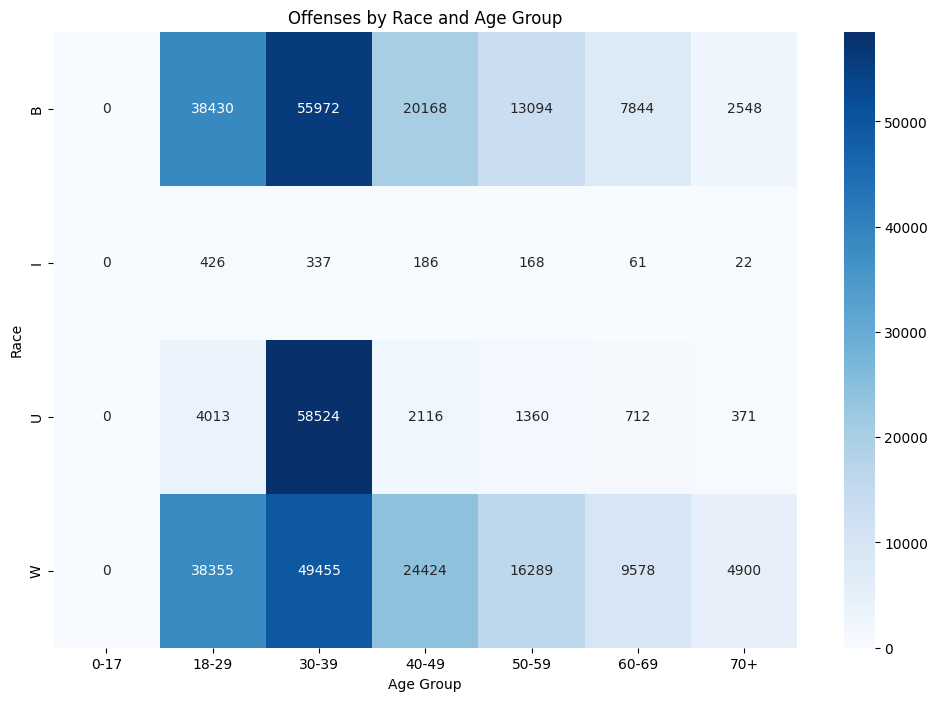

In [ ]:

bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Define age bins
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
filtered_data['Age_Group'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)

# Step 2: Create a pivot table for the heatmap
race_age_heatmap_data = filtered_data.pivot_table(
    index='Race',
    columns='Age_Group',
    values='Offense',
    aggfunc='count',  # Count offenses for each race and age group
    fill_value=0      # Fill missing values with 0
)

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(race_age_heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Offenses by Race and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.show()


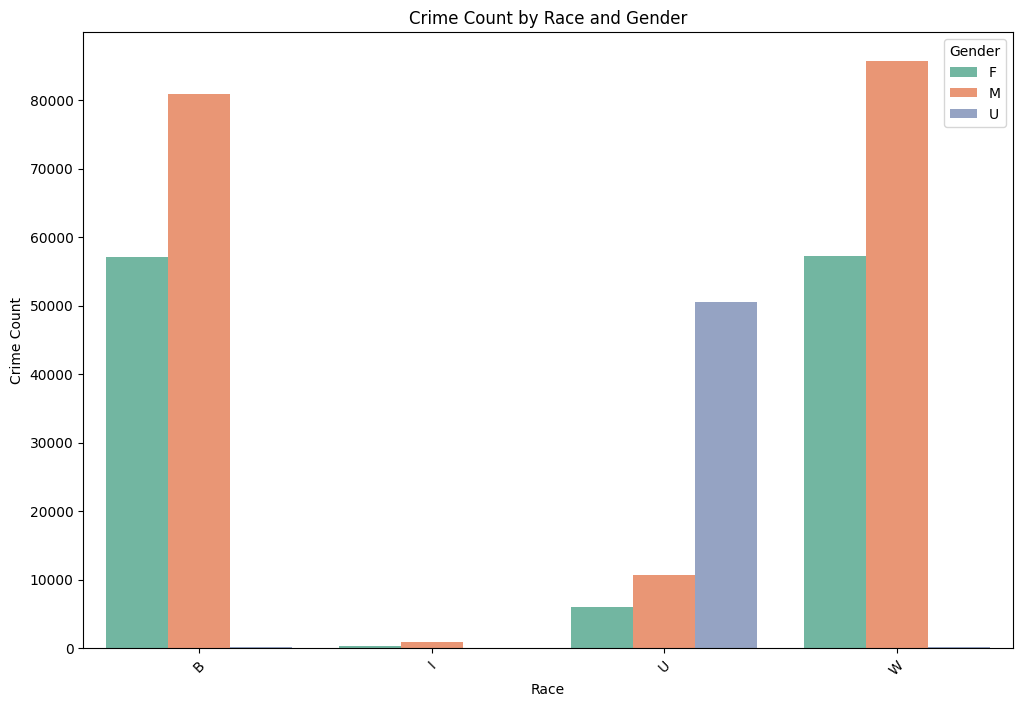

In [ ]:
# Run the SQL query
race_gender_distribution = spark.sql("""
    SELECT
        Race,
        Sex AS Gender,
        COUNT(*) AS Crime_Count
    FROM
        kccrime
    GROUP BY
        Race,
        Sex
    ORDER BY
        Race,
        Sex
""")

# Convert to Pandas DataFrame for plotting
race_gender_df = race_gender_distribution.toPandas()

# Plotting the race-gender distribution
plt.figure(figsize=(12, 8))
sns.barplot(data=race_gender_df, x='Race', y='Crime_Count', hue='Gender', palette='Set2')
plt.title('Crime Count by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Crime Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()
